<div align="right"><sub>IN726 Data Science and Machine Intelligence (15 credits), Semester 1, 2020</sub>
</div>


# Assignment 2
Due Date: Friday, June 12th, 5pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---

### Learning outcomes
- <font size="1">Analyse the principles, advantages, limitations and possible applications of machine learning</font>
- <font size="1">Generate solutions to solve machine learning problems and design and implement test procedures in order to evaluate the model.</font>
- <font size="1">Adapt mathematical intuition from Linear Algebra, Probability and Statistics to machine intelligence</font>
- <font size="1">Apply data mining techniques to fetch, scrub, explore, visualize, model, evaluate, and interpret data</font>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Time series analysis


Let's load some data about average monthly temperatures in New Zealand since 1853

In [2]:
dfM=pd.read_csv('./averageMonthlyTemperatureNZ.csv',index_col='date',parse_dates=True)
dfM

,AverageTemperature
date,
1853-01-01,13.387
1853-02-01,13.039
1853-03-01,11.643
1853-04-01,9.577
1853-05-01,7.286
...,...
2013-04-01,12.279
2013-05-01,9.006
2013-06-01,6.463


Let's calculate average yearly temperature in NZ:

In [3]:
dfY=dfM.resample('Y').mean()
dfY

,AverageTemperature
date,
1853-12-31,8.884250
1854-12-31,9.728917
1855-12-31,9.852083
1856-12-31,9.501833
1857-12-31,9.320917
...,...
2009-12-31,10.653583
2010-12-31,11.335750
2011-12-31,11.163250


Displaying the yearly time series:

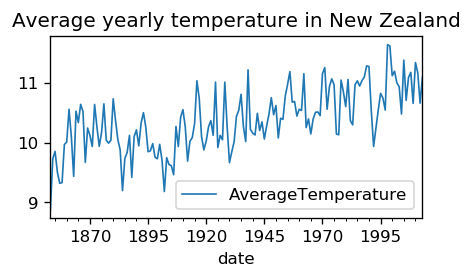

In [4]:
plt.rcParams.update({'figure.figsize': (4, 2), 'figure.dpi': 120})
dfY.plot(title="Average yearly temperature in New Zealand",linewidth=1)

Displaying the last 10 years of data in the monthly temperature time series:

(array([408, 420, 432, 444, 456, 468, 480, 492, 504, 516]),
 <a list of 10 Text xticklabel objects>)

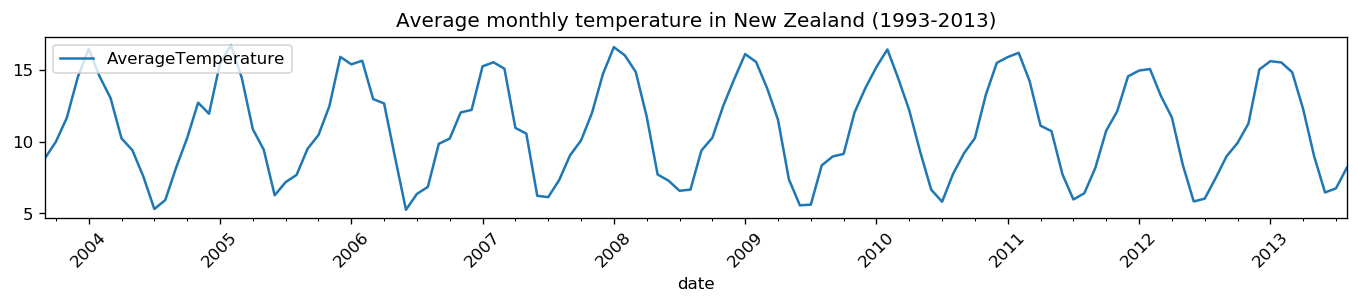

In [5]:
plt.rcParams.update({'figure.figsize': (14, 2), 'figure.dpi': 120})
dfM.iloc[-120:].plot(title="Average monthly temperature in New Zealand (1993-2013)")
plt.xticks(rotation=45)

#### 1. Is the monthly temperature time series stationary?

In [7]:
# ANSWER GOES HERE
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./averageMonthlyTemperatureNZ.csv', usecols=['date','AverageTemperature'],parse_dates=['date'], index_col='date')

# ADF Test
result = adfuller(dfM.AverageTemperature.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

print(f'Time series appears to be stationary as the p-value is less than 0.5')

ADF Statistic: -4.721195565403463
p-value: 7.676688015887955e-05
Critial Values:
   1%, -3.433794582887893
Critial Values:
   5%, -2.8630615877583185
Critial Values:
   10%, -2.567580035583033
Time series appears to be stationary as the p-value is less than 0.5


#### 2. Display the autocorrelation of the monthly temperature time series and explain the results you see

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


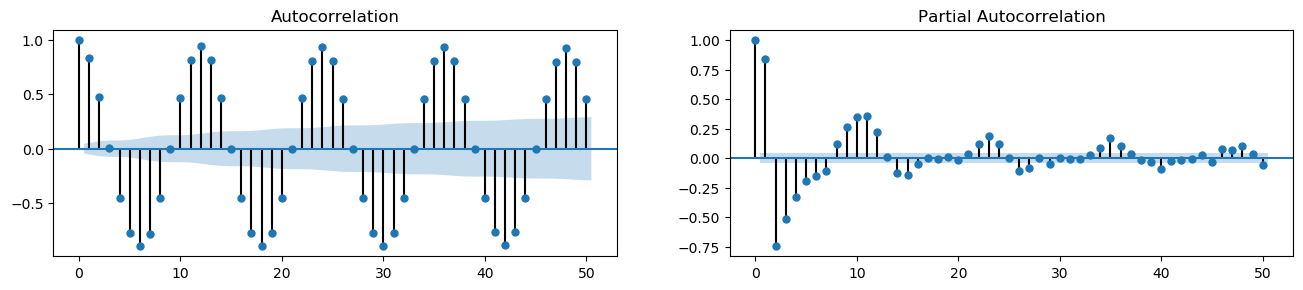

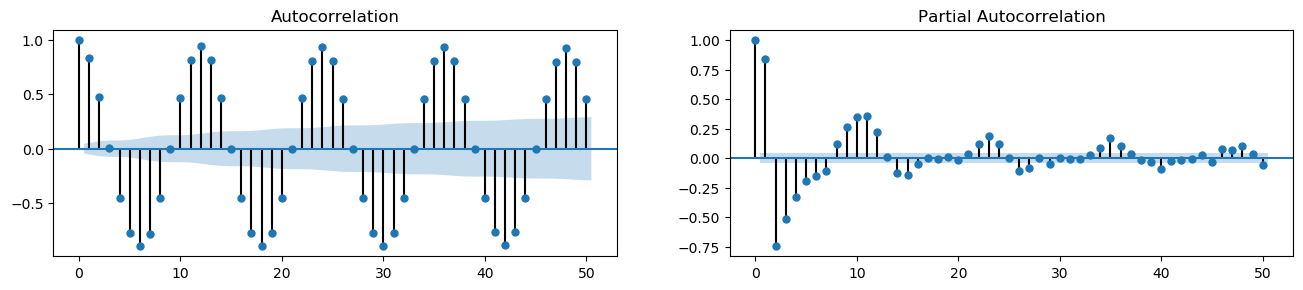

In [8]:
# ANSWER GOES HERE

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('./averageMonthlyTemperatureNZ.csv', usecols=['date','AverageTemperature'],parse_dates=['date'], index_col='date')

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(df.AverageTemperature, nlags=50)
pacf_50 = pacf(df.AverageTemperature, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.AverageTemperature.tolist(), lags=50, ax=axes[0])
plot_pacf(df.AverageTemperature.tolist(), lags=50, ax=axes[1])


# Every 6 months there is a negative correlation and every 12 months there is a positive correlation. Because the temperature changes drastically every 6 month since the temperature changes every season. From winter to summer is 6 months and summer to summer is 12 month.

#### 3. Apply a moving average to the yearly temperature time series with a window size of 30. Display both the original yearly temperature time series and the moving average (30) smoothed time series:

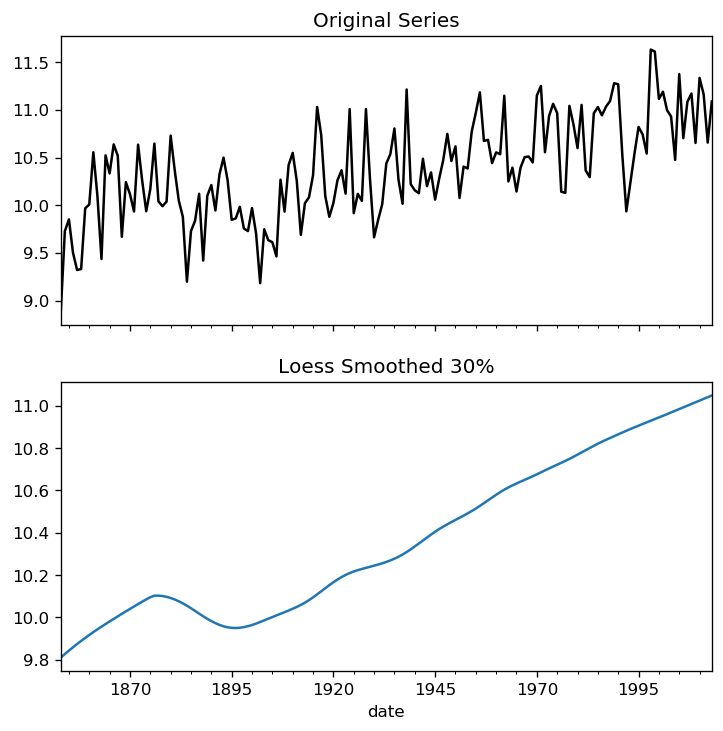

In [9]:
# ANSWER GOES HERE
from statsmodels.nonparametric.smoothers_lowess import lowess
dfY=dfM.resample('Y').mean()

df_loess_30 = pd.DataFrame(lowess(dfY.AverageTemperature, np.arange(len(dfY.AverageTemperature)), frac=0.30)[:, 1], index=dfY.index, columns=['AverageTemperature'])

fig, axes = plt.subplots(2,1, figsize=(7, 7), sharex=True, dpi=120)
dfY['AverageTemperature'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_30['AverageTemperature'].plot(ax=axes[1], title='Loess Smoothed 30%')

plt.show()



#### 4. Find a good predictive model that uses the last 120 months of monthly temperature time series data and predicts temperature for the next 24 months:

In [10]:
# ANSWER GOES HERE
import pmdarima as pm
data = pd.read_csv('./averageMonthlyTemperatureNZ.csv', usecols=['date','AverageTemperature'],parse_dates=['date'], index_col='date')
data_120months = data.tail(120)
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data_120months, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()



Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,12) [intercept=True]; AIC=285.660, BIC=299.071, Time=0.685 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=347.760, BIC=353.124, Time=0.010 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=311.695, BIC=322.423, Time=0.193 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=283.824, BIC=294.553, Time=0.935 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=346.025, BIC=348.708, Time=0.012 seconds
Fit ARIMA(1,0,1)x(0,1,0,12) [intercept=True]; AIC=349.376, BIC=360.104, Time=0.092 seconds
Fit ARIMA(1,0,1)x(1,1,1,12) [intercept=True]; AIC=283.046, BIC=299.139, Time=1.154 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
F

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  120
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -134.369
Date:                    Mon, 08 Jun 2020   AIC                            278.739
Time:                            12:28:14   BIC                            292.149
Sample:                                 0   HQIC                           284.176
                                    - 120                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0370      0.030      1.226      0.220      -0.022       0.096
ar.S.L12      -0.3463      0.197     -1.758      0.079      -0.732       0.040
ar.S.L24      -0.2113      0.189     -1.116      0.264      -0.582       0.160
ma.S.L12      -0.8793      0.377     -2.331      0.020      -1.618      -0.140
sigma2         0.5446      0.148      3.685      0.000       0.255       0.834
===================================================================================
Ljung-Box (Q):                       45.24   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.26   Prob(JB):                         0.93
Heteroskedasticity (H):               0.66   Skew:                            -0.08
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

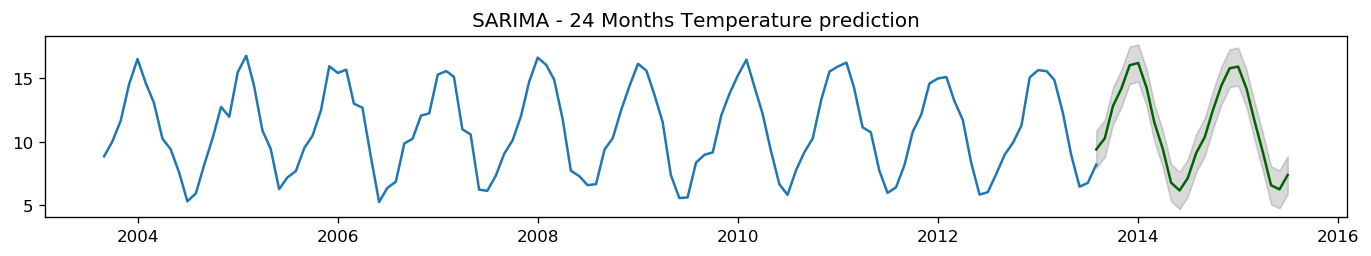

In [11]:
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data_120months.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data_120months)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - 24 Months Temperature prediction")
plt.show()

Let's load a data set of atmosphere CO2 concentration over time

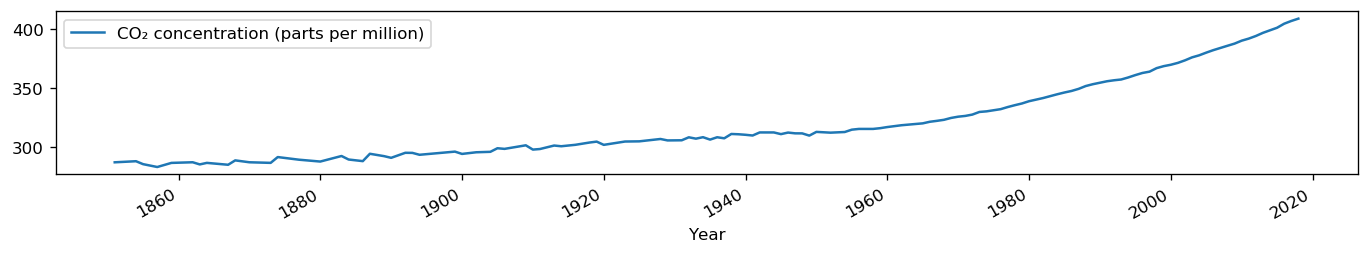

In [12]:
dfCo2=pd.read_csv('./co2.csv',index_col='Year',parse_dates=True)
dfCo2.plot()

#### 5. Now the million dollar question: Does increasing CO2 concentration in the atmosphere *cause* rising temperatures. Obviously, causality is a philosophically elusive concept. The fact that a phenomena precedes another in time is a necessary but not sufficient condition for true causality. Use the appropriate technique from time series analysis for suggestive (but perhaps not definite) evidence about whether rising CO2 *causes* rising global temperature. Use the yearly temperatures data frame. Note: this question requires you to play a bit with the data to merge it, fill missing values and then applying the appropriate statistical test. The point of this exercise is that you solve this question by researching and navigating the appropriate technical documentation

In [13]:
# ANSWER GOES HERE
from datetime import datetime
dfCo2Data=pd.read_csv('./co2.csv',usecols=['Year','CO₂ concentration (parts per million)'])
df_temperature =pd.read_csv('./averageMonthlyTemperatureNZ.csv',index_col='date',parse_dates=True)
dfCo2Data['Year'] = pd.to_datetime(dfCo2Data['Year'])#parse the year column to datetime type

fulldfCo2Data = pd.concat([pd.DataFrame([(datetime(i,1,1),float("NaN"))], columns=['Year','CO₂ concentration (parts per million)']) for i in range(dfCo2Data['Year'].iloc[0].year,(dfCo2Data['Year'].iloc[-1].year)+1)],
          ignore_index=True)#create a dataframe from 1851 to 2018 to fill in the missing year
final = pd.merge(dfCo2Data, fulldfCo2Data, on='Year', how='outer') #merge the missing year dataframe to the full year dataframe
final = final.sort_values('Year')
final_ffill = final.ffill() #forward fill the co2 concentration
final_ffill = final_ffill.set_index('Year')
final_ffill = final_ffill.drop('CO₂ concentration (parts per million)_y', axis=1)

#adding the temperature dataframe to the processed co2 dataframe
df_temperature_year = df_temperature.resample('AS').mean()
df_temperature_year = df_temperature_year.reset_index()
df_temperature_year.rename(columns={'date':'Year'}, inplace=True)
df_co2_temperature = pd.merge(df_temperature_year, final_ffill, on='Year', how='outer')
df_co2_temperature_ffill = df_co2_temperature.ffill()
df_co2_temperature_ffill


,Year,AverageTemperature,CO₂ concentration (parts per million)_x
0,1853-01-01,8.884250,287.13
1,1854-01-01,9.728917,288.05
2,1855-01-01,9.852083,285.57
3,1856-01-01,9.501833,285.57
4,1857-01-01,9.320917,283.16
...,...,...,...
163,2014-01-01,11.088500,398.65
164,2015-01-01,11.088500,400.83
165,2016-01-01,11.088500,404.24
166,2017-01-01,11.088500,406.55


In [14]:
# Using Granger Causality test to test whether rising CO2 causes rising global temperature
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df_co2_temperature_ffill[['AverageTemperature','CO₂ concentration (parts per million)_x']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=29.1708 , p=0.0000  , df_denom=164, df_num=1
ssr based chi2 test:   chi2=29.7044 , p=0.0000  , df=1
likelihood ratio test: chi2=27.3393 , p=0.0000  , df=1
parameter F test:         F=29.1708 , p=0.0000  , df_denom=164, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.2994 , p=0.0000  , df_denom=161, df_num=2
ssr based chi2 test:   chi2=25.3626 , p=0.0000  , df=2
likelihood ratio test: chi2=23.6023 , p=0.0000  , df=2
parameter F test:         F=12.2994 , p=0.0000  , df_denom=161, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3885  , p=0.0004  , df_denom=158, df_num=3
ssr based chi2 test:   chi2=20.0146 , p=0.0002  , df=3
likelihood ratio test: chi2=18.8907 , p=0.0003  , df=3
parameter F test:         F=6.3885  , p=0.0004  , df_denom=158, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.2609  , p=0.0027  

{1: ({'ssr_ftest': (29.170806752132364, 2.2945692820259225e-07, 164.0, 1),
   'ssr_chi2test': (29.70441907076893, 5.031998065535662e-08, 1),
   'lrtest': (27.339299254500474, 1.7070649342332698e-07, 1),
   'params_ftest': (29.17080675205599, 2.2945692821026772e-07, 164.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (12.299353603828278, 1.0695468249168462e-05, 161.0, 2),
   'ssr_chi2test': (25.362642214105517, 3.108652805754415e-06, 2),
   'lrtest': (23.60229331798672, 7.495957677964275e-06, 2),
   'params_ftest': (12.299353603827782, 1.069546824917298e-05, 161.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.388488808746076, 0.00041041484111160317, 158.0, 3),
   'ssr_chi2test': (20.014569369172836, 0.0001685664037036572, 3),
   'lrtest': (18.890701734917513, 0.00028800020944197343, 3),
   'params_ftest': (6.388488808746188, 0.00041041484111154137, 158.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.

In [15]:
#The p-value of the 4 lags are less than 0.05, so we can reject the null hypothesis that the CO₂ concentration time series does not Granger-cause the AverageTemperature time series. That is, knowing the CO₂ concentration helps to predict the AverageTemperature.

### TensorFlow

In this exercise you are supposed to train a simple two layer fully connected neural network to classify images of clothing, like sneakers and shirts. To do that, we will use the a fashion dataset which contains 70,000 grayscale images in 10 categories. Each image shows individual articles of clothing at low resolution (28 by 28 pixels):

<a id="clothingExercise"></a>
#### 6. Train the model on the training data and estimate its performance on the test data. You should shoot for accuracy above 80%. 

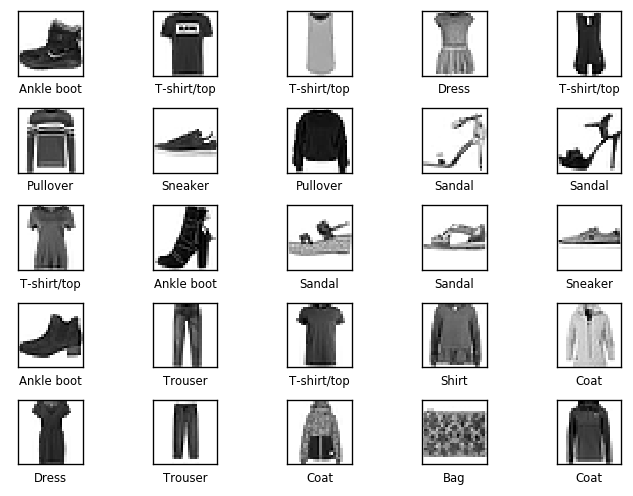

In [16]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#The data must be preprocessed before training the network. We can scale these values to a range of 0 to 1 before feeding them to the neural
#network model. To do that we simply divide by the maximum number in the data
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig=plt.figure(figsize=(7,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]],fontsize=7)
fig.subplots_adjust(hspace=0.5)    
plt.show()

In [17]:
# ANSWER GOES HERE
image_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

image_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
image_model.fit(train_images, train_labels, epochs=10)



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 58us/sample - loss: 1.7393 - accuracy: 0.7273
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.6793 - accuracy: 0.7833
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 1.6680 - accuracy: 0.7940
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.6600 - accuracy: 0.8020
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 1.6555 - accuracy: 0.8061
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 1.6504 - accuracy: 0.8114
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1.6489 - accuracy: 0.8127
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 1.6458 - accuracy: 0.8156
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 1.6413 - accuracy: 0.8203
Epoch 10/10
60

In [18]:
test_loss, test_acc = image_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 1.5974 - accuracy: 0.8646

Test accuracy: 0.8646


## Text classification

The following script preprocesses a bunch of Tweets about different airlines in order to fit the data into a sentiment analysis model created in the next notebook cell. Don't worry about the technical details of this preprocessing, they are not necessary for the exercise.

In [19]:
# Basic packages
import pandas as pd 
import numpy as np
import tensorflow as tf
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Packages for data preparation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers


NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20  # Maximum number of words in a sequence

def remove_mentions(input_text):
    #Function to remove mentions, preceded by @, in a Pandas Series
    return re.sub(r'@\w+', '', input_text)

df = pd.read_csv('./Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_mentions)

X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print("Raw data set")
print(X_train)

print(X_train[0])

tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

X_train_oh = tk.texts_to_matrix(X_train, mode='binary')
X_test_oh = tk.texts_to_matrix(X_test, mode='binary')

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

# Train data samples: 13176
# Test data samples: 1464
Raw data set
7226      great to see the RedSox plane and your remind...
9863      can't seem to find the pilots for our 6pm fli...
10813       Just talked to reservation. Must congratula...
5158      Thanks for sending my kid to the #Destination...
8625      last week I bought a plane ticket round trip ...
                               ...                        
12596     no not yet. Waiting now to be connected to an...
13604     westjet and your rep won't do anything about ...
2146      Doesn't have to be same flight 2 and 2 will w...
2093           thank you! Much appreciation for your help.
8397      = WORST. Booked in Oct. w/ email confirm &amp...
Name: text, Length: 13176, dtype: object
 What  said.
Fitted tokenizer on 13176 documents
10000 words in dictionary
Top 5 most common words are: [('to', 7766), ('the', 5461), ('i', 4812), ('a', 4051), ('you', 3708)]
"neutral" is converted into 2
"2" is converted into [0. 0. 1.]
Shape

#### 7. What's wrong with the following model and its training? Provide a brief textual explanation. If there is something wrong, fix it and create a visualization that shows that you have improved the model and its training.

In [20]:
model = models.Sequential()

model.add(layers.Dense(2048, activation='relu', input_shape=(NB_WORDS,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

history = model.fit(X_train_rest,y_train_rest,
                    epochs=10,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_valid, y_valid),
                    verbose=1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2048)              20482048  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

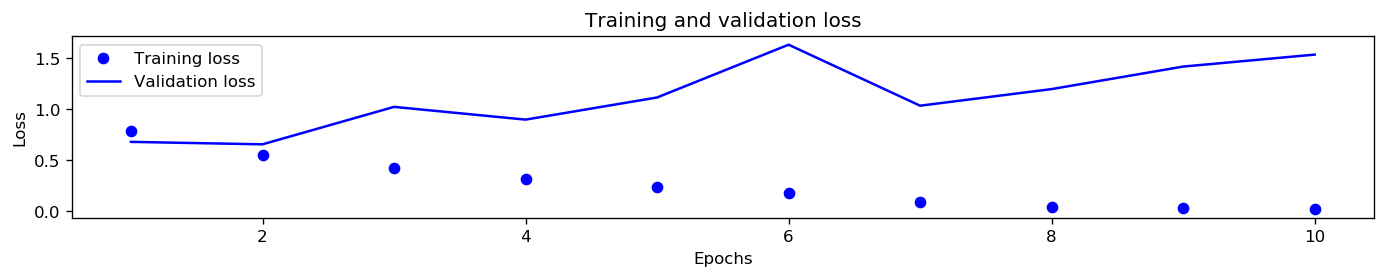

In [21]:
# showing the plot of overfitting model
# The model is overfitting when it is on epoch 4-5
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 11858 samples, validate on 1318 samples
Epoch 1/10
11858/11858 [==============================] - 1s 107us/sample - loss: 0.9918 - accuracy: 0.5857 - val_loss: 0.8761 - val_accuracy: 0.6252
Epoch 2/10
11858/11858 [==============================] - 1s 68us/sample - loss: 0.8062 - accuracy: 0.6474 - val_loss: 0.7734 - val_accuracy: 0.6616
Epoch 3/10
11858/11858 [==============================] - 1s 67us/sample - loss: 0.6986 - accuracy: 0.7022 - val_loss: 0.6861 - val_accuracy: 0.7291
Epoch 4/10
11858/11858 [==============================] - 1s 64us/sample - loss: 0.5959 - accuracy: 0.7815 - val_loss: 0.6177 - val_accuracy: 0.7625
Epoch 5/10
11858/11858 [==============================] - 1s 67us/sample - loss: 0.5131 - accuracy: 0.8294 - val_loss: 0.5702 - val_accuracy: 0.7868
Epoch 6/10
11858/11858 [==============================] - 1s 67us/sample - loss: 0.4524 - accuracy: 0.8592 - val_loss: 0.5413 - val_accuracy: 0.7944
Epoch 7/10
11858/11858 [==============================] 

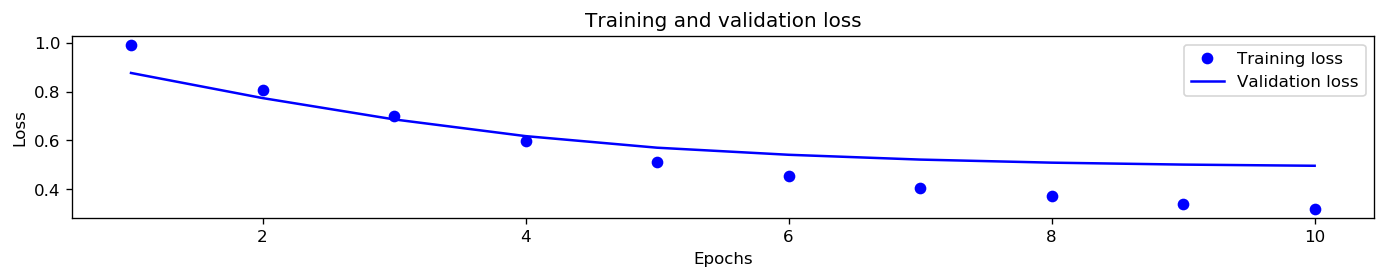

In [22]:
# ANSWER GOES HERE

# The above model has a large number of trainable parameters. 
# The higher the number, the easier the model can memorize the target class for each training sample.
# Lowering the capacity of the network will force the model to learn the patterns that matter instead of learning the pattern or minimize the loss.
# We lower the capacity by removing some of the dense layer in the network.
# However we cannot reduce it too much as well or else it might lead to underfitting.
# We can also use Regularization to reduce overfitting. Adding dropout layers also help by randomly set the output features of a layer to zero.

import matplotlib.pyplot as plt

reduced_model = models.Sequential()
reduced_model.add(layers.Dense(16, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))

reduced_model.compile(optimizer='adam'
              , loss='categorical_crossentropy'
              , metrics=['accuracy'])

reduced_model_history = reduced_model.fit(X_train_rest,y_train_rest,
                                            epochs=10,
                                            batch_size=BATCH_SIZE,
                                            validation_data=(X_valid, y_valid),
                                            verbose=1)
reduced_model_history_dict = reduced_model_history.history
reduced_model_history_dict.keys()

acc = reduced_model_history.history['accuracy']
val_acc = reduced_model_history.history['val_accuracy']
loss = reduced_model_history.history['loss']
val_loss = reduced_model_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

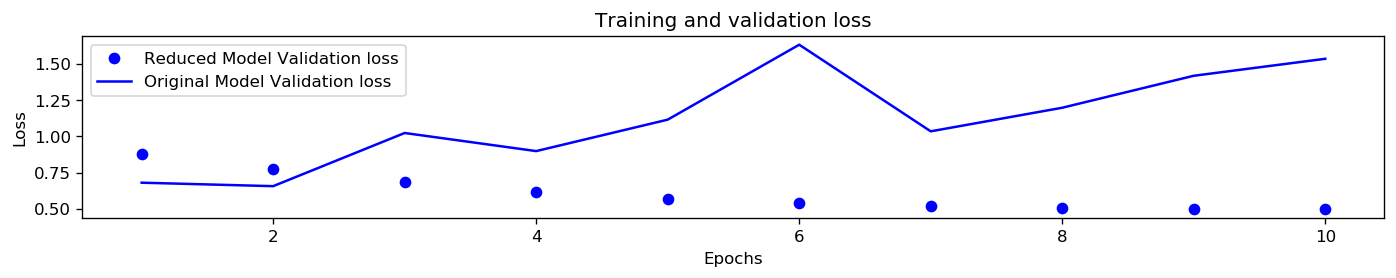

In [23]:
#Visualization on improve model compare to the original model.

epochs = range(1, len(acc) + 1)

plt.plot(epochs, reduced_model_history_dict['val_loss'], 'bo', label='Reduced Model Validation loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Original Model Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Computer vision and Image Classification

#### 8. Build a convolutional neural network and train it on the fashion data set from the [Clothing recognition exercise](#clothingExercise). Don't worry about using a validation set. Just train on the training set and then estimate performance of the model on the test set. You should get a test set accuracy around or above 90%.

In [24]:
# ANSWER GOES HERE
from tensorflow.keras import layers
from tensorflow.keras import models

convo_model = models.Sequential()

#The next layer is design to have 32 channels (kernesl) in depth of size 3x3.
#The activation function is said to be a rectifier Linear unit (Relu)
#The input to the layer are 28 x 28 grayscale images
convo_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
#now we add a Max pooling layer of size 2x2
convo_model.add(layers.MaxPooling2D((2, 2)))
#Another convolutional layer, this one with 64 kernels
convo_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#and another Max pooling
convo_model.add(layers.MaxPooling2D((2, 2)))
#And another convolution
convo_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
convo_model.add(layers.Flatten())
convo_model.add(layers.Dense(64, activation='relu'))
convo_model.add(layers.Dense(10, activation='softmax'))

convo_model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [25]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

convo_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
convo_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.5364 - accuracy: 0.8019
Epoch 2/5
60000/60000 [==============================] - 38s 626us/sample - loss: 0.3323 - accuracy: 0.8784
Epoch 3/5
60000/60000 [==============================] - 41s 680us/sample - loss: 0.2824 - accuracy: 0.8971
Epoch 4/5
60000/60000 [==============================] - 55s 925us/sample - loss: 0.2535 - accuracy: 0.9073- l
Epoch 5/5
60000/60000 [==============================] - 39s 654us/sample - loss: 0.2292 - accuracy: 0.9156


In [26]:
test_loss, test_acc = convo_model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 2s 213us/sample - loss: 0.2640 - accuracy: 0.9032
0.9032


#### 9. Use the ResNet50 Convolutional neural network model (pretrained on the ImageNet Challenge data set) and available in TensorFlow to classify the following image:
![](./images/church.jpg). 

In [27]:
# ANSWER GOES HERE
import numpy as np
from PIL import Image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
img_path = './images/church.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n03028079', 'church', 0.9393937), ('n02825657', 'bell_cote', 0.057633534), ('n03781244', 'monastery', 0.0010108432), ('n03930313', 'picket_fence', 0.0009822736), ('n04435653', 'tile_roof', 0.0002388291)]]


# Transfer learning

In this exercise, you are required to use transfer learning, which means starting with a model that has already been trained on another but similar problem and retraining the last layers of the model on a specific problem set we are interested in. Creating a top-performing Deep learning model from scratch requires a huge training set of images and can take days in clusters of GPUs, but transfer learning can take advantage of that previous work and be done in short order.

We are going to use the Inception v3 network. Inception v3 is trained for the ImageNet Large Visual Recognition Challenge and it can differentiate between 1,000 different classes of objects on images, like dogs or dishwashers. We will use this same network, but retrain its top layers to tell apart a small number of classes (6) based on our own examples. Use the following data set for the retraining:

`I:\COURSES\ITP\BITY3\IN726-dsmi-data\dsmi_machine_vision_challenge.rar`

**Note: you can also find the data set in the Classroom Teams channel.**

`dsmi_machine_vision_challenge.rar` is a small data set with a few hundred images belonging to just 6 categories: electric guitar, elephant, human faces, helicopter, motorbikes and the ying-yang symbol. Your task is to create a computer vision model specialized in discriminating between this 5 categories of images.

#### 10. Retrain the  `InceptionV3` network model using transfer learning in TensorFlow. As noted in class, Inception is a huge image classification model with millions of parameters that can differentiate a large number of different image classes. You are only required to train the final layer of that network for our specific problems set, so training will end in a reasonable amount of time. You will need to do some research about the number of units you need in the last layer and the type of activation to use. You will also need to tinker with the kind of loss function that you want to use. I have already divided the data set into proper training, validation and test sets. You should get around 90% classification accuracy on the test set. We could get much higher accuracy if we would use more training data, but a few hundred images as provided in the linked data set should suffice for getting around 90% classification accuracy.

In [28]:
# ANSWER GOES HERE
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=True )
conv_base.summary()

base_dir = r".\dsmi_machine_vision_challenge"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

def extract_features(directory, sample_count):
    #Notice that the dimensions of the features variable coincide with the output of the pretrained convnet!!!!!!!
    features = np.zeros(shape=(sample_count,1000)) 
    labels = np.zeros(shape=(sample_count,6))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(299, 299),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 100)
validation_features, validation_labels = extract_features(validation_dir, 100)
test_features, test_labels = extract_features(test_dir, 100)


train_features = np.reshape(train_features, (100, 1000))
validation_features = np.reshape(validation_features, (100, 1000))
test_features = np.reshape(test_features, (100, 1000))

Using TensorFlow backend.


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Found 1055 images belonging to 6 classes.
Found 276 images belonging to 6 classes.
Found 227 images belonging to 6 classes.


In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

img_clasi_model = models.Sequential()
img_clasi_model.add(layers.Dense(2048, activation='relu', input_dim=1000))
img_clasi_model.add(layers.Dropout(0.5))
img_clasi_model.add(layers.Dense(6, activation='softmax'))

img_clasi_model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = img_clasi_model.fit(train_features, train_labels,
                    epochs=25,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 100 samples, validate on 100 samples
Epoch 1/25
100/100 [==============================] - 0s 4ms/sample - loss: 1.7120 - acc: 0.6700 - val_loss: 1.6517 - val_acc: 0.6500
Epoch 2/25
100/100 [==============================] - 0s 719us/sample - loss: 1.4901 - acc: 0.8300 - val_loss: 1.5149 - val_acc: 0.5700
Epoch 3/25
100/100 [==============================] - 0s 679us/sample - loss: 1.2580 - acc: 0.8200 - val_loss: 1.3701 - val_acc: 0.5700
Epoch 4/25
100/100 [==============================] - 0s 719us/sample - loss: 1.0215 - acc: 0.8200 - val_loss: 1.2408 - val_acc: 0.5800
Epoch 5/25
100/100 [==============================] - 0s 679us/sample - loss: 0.8137 - acc: 0.8300 - val_loss: 1.1424 - val_acc: 0.6300
Epoch 6/25
100/100 [==============================] - 0s 719us/sample - loss: 0.6488 - acc: 0.8200 - val_loss: 1.0766 - val_acc: 0.6500
Epoch 7/25
100/100 [==============================] - 0s 719us/sample - loss: 0.5468 - acc: 0.8500 - val_loss: 1.0106 - val_acc: 0.6800
Epoc

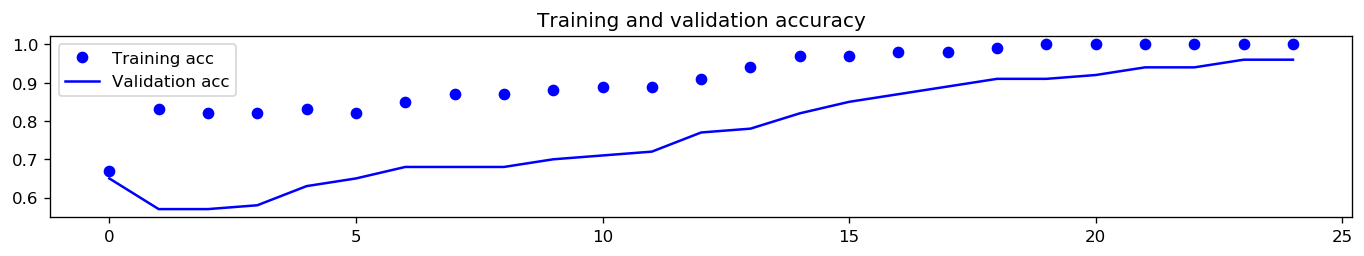

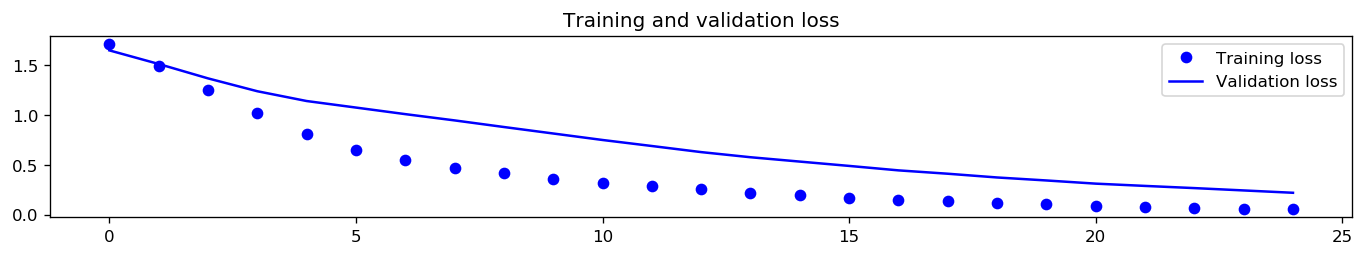

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
[loss, accuracy] = img_clasi_model.evaluate(test_features, test_labels)

100/100 [==============================] - 0s 1ms/sample - loss: 0.1971 - acc: 0.9600


# Word embeddings

#### 11. Train a word2vec model on a small sample of text I gathered from Princeton University at `I:\COURSES\EAD\AITEIT3\BITY3\IN726-dsmi-data\princeton.csv`. (**Note: you can also find the data set in the Classroom Teams channel.**). Use word embeddings of 100 dimensions, window size of 10 and only incorporate words in the model vocabulary that occur at least 10 times in the corpus. 

if you want to optimize training speed, read this blog post on optimization of the algorithm:
- https://rare-technologies.com/word2vec-in-python-part-two-optimizing/
- https://rare-technologies.com/parallelizing-word2vec-in-python/

For better results you can use the training file `princetonFull.csv` which contains eight times more text, but training will take longer.

In [33]:
# ANSWER GOES HERE
import gensim
from gensim.models.word2vec import Word2Vec
import os
import pandas as pd

inputPath = os.path.normpath(r'.') 
fileName = 'princeton.csv'                             
inputFilePath = os.path.join(inputPath, fileName)                
df=pd.read_csv(inputFilePath)



In [34]:
from gensim.parsing.preprocessing import * #provides a number of convenience preprocessing functions optimized for speed
import csv

def preprocessing(file):
    
    CUSTOM_FILTERS = [lambda x: x.lower(), #To lowercase
                      lambda text: re.sub(r'https?:\/\/.*\s', '', text, flags=re.MULTILINE), #To Strip away URLs
                      strip_tags, #Remove tags from s using RE_TAGS.
                      strip_non_alphanum,#Remove non-alphabetic characters from s using RE_NONALPHA.
                      strip_punctuation, #Replace punctuation characters with spaces in s using RE_PUNCT.
                      strip_numeric, #Remove digits from s using RE_NUMERIC.
                      strip_multiple_whitespaces,#Remove repeating whitespace characters (spaces, tabs, line breaks) from s and turns tabs & line breaks into spaces using RE_WHITESPACE.
                      remove_stopwords, # Set of 339 stopwords from Stone, Denis, Kwantes (2010).
                      lambda x: strip_short(x, minsize=3), #Remove words with length lesser than minsize from s.
                     ]

    csv.field_size_limit(2147483647)
    with open(file,'r', newline='',encoding="utf-8") as inpFile:

        csvObject = csv.reader(inpFile, delimiter=',',quotechar='"')

        wordThreshold=5 #Important: filter out sentences with less than wordThreshold words

        sentences = []
        for csvEntry in csvObject:
            if len(csvEntry)>1:
                lines = csvEntry[1].split('\n') #csvEntry[0] is url csvEntry[1] is text Fetched from URL

                for line in lines: #Different elements appear in their own line
                    words = preprocess_string(line,CUSTOM_FILTERS)

                    if len(words)>wordThreshold: #Important: filter out sentences with less than wordThreshold words
                        sentences.append(words)
    wordsInCorpus=0
    for i, s in enumerate(sentences):
        wordsInCorpus += len(s)
    print("Number of words in corpus:",wordsInCorpus)
    print("Number of sentences in corpus:",len(sentences))
    return sentences

sentences = preprocessing(inputFilePath)

Number of words in corpus: 3614743
Number of sentences in corpus: 178390


In [35]:
model = Word2Vec(sentences, # The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network
                 sg=0, #Defines the training algorithm. If 1, skip-gram is employed; otherwise, CBOW is used
                 size=100,#Dimensionality of the feature vectors
                 window=15,# The maximum distance between the current and predicted word within a sentence
                 min_count=5, #Ignores all words with total frequency lower than this
                 workers=4, #Use these many worker threads to train the model (=faster training with multicore machines).
                 iter = 5, # (int) – Number of iterations (epochs) over the corpus. //5
                )

#### 12. Print the vector/word embedding for the word `king`:

In [36]:
# ANSWER GOES HERE
print(model.wv['king'])



[ 0.54988766  1.4374924   0.11605347  0.65325314 -1.2697895   0.32272947
 -2.0013916   0.5611524  -2.0989163  -1.3297546   0.6458343   0.24845211
 -0.03208539 -0.25089794 -0.00679961 -2.2438505  -0.46464947 -0.9625364
  0.22402598 -0.7880392   0.31257558  1.1057329  -1.1618464  -0.08338168
 -0.40179187 -2.1770315  -0.18971346  0.05779576  0.30778137  0.5510127
 -0.19900863 -0.15654498 -1.3975445   1.274459   -2.1361      1.0913244
  1.1962621  -1.0426141   0.9879004   2.011822    0.30640653  1.6633387
  1.8845543   1.1735973   0.15280472  2.235074    0.6251303   1.1055597
  0.6200412   0.626109   -0.85770375  2.7218273  -0.39983824  0.27187434
 -0.94923973 -0.35529846  0.4336129  -1.5369077   0.727082   -1.8398811
  1.3694708   0.04279783  1.0387958   1.0556141  -2.607655    1.2387146
 -0.35473046  0.42401585 -3.3315794  -0.89703834  0.3517831   1.2281922
  1.0621834  -0.34836265  1.2222979   0.1619998  -0.55403125  1.6026329
 -1.2134621   1.9473037  -1.327022   -0.22878231 -1.3061177 

#### 13. What are the top 10 most similar words to the word `bike`? 

In [37]:
# ANSWER GOES HERE
model.wv.most_similar(positive=['bike'])



[('bikes', 0.9245854020118713),
 ('bicycle', 0.9095574021339417),
 ('carts', 0.8715567588806152),
 ('buses', 0.8547691106796265),
 ('biking', 0.8390329480171204),
 ('tigertransit', 0.8366419672966003),
 ('bus', 0.8354436159133911),
 ('rent', 0.8349605798721313),
 ('ride', 0.8288135528564453),
 ('shops', 0.8271287083625793)]

#### 14. What is the cosine similarity between the words `programmer` and `software`? 

In [38]:
# ANSWER GOES HERE
model.wv.similarity('programmer', 'software')



0.44537523

#### 15. What are the closest vectors to the result of adding the vectors for `disease` and `brain`?

In [39]:
# ANSWER GOES HERE
model.most_similar(positive=['disease','brain'])



C:\Users\ASUS\.conda\envs\trash\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('disorders', 0.8622424602508545),
 ('diseases', 0.800638735294342),
 ('developmental', 0.7873047590255737),
 ('autism', 0.7767256498336792),
 ('disorder', 0.7765936851501465),
 ('aging', 0.7712812423706055),
 ('infectious', 0.7670325040817261),
 ('parkinson', 0.7661751508712769),
 ('neurological', 0.7637462019920349),
 ('alzheimer', 0.7593066692352295)]

#### 16. Use your model to guess an answer to the following analogy: `Madrid is to Spain as London is to...`

In [43]:
# ANSWER GOES HERE
from gensim.models import KeyedVectors
#We can use googlenews vector to improve our model. However, i decided that the current model is sufficient enough.
#filename = './GoogleNews-vectors-negative300.bin' #We can use the compressed file
#model = KeyedVectors.load_word2vec_format(filename, binary=True)

model.most_similar(positive=['london','spain'], negative=['madrid'])



C:\Users\ASUS\.conda\envs\trash\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


[('rome', 0.7204670906066895),
 ('jerusalem', 0.7093149423599243),
 ('translated', 0.7002568244934082),
 ('england', 0.6925990581512451),
 ('scotland', 0.6750800609588623),
 ('germany', 0.6732563972473145),
 ('oxford', 0.6670604944229126),
 ('british', 0.6655361652374268),
 ('biblical', 0.663833737373352),
 ('italy', 0.6629394292831421)]

#### 17. Plot your word embeddings after applying t-SNE dimensionality reduction for the following words:
```
biology, chemistry, history, literature, lecturer, professor, undergraduates, students, swimming, running, rowing
```

C:\Users\ASUS\.conda\envs\trash\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


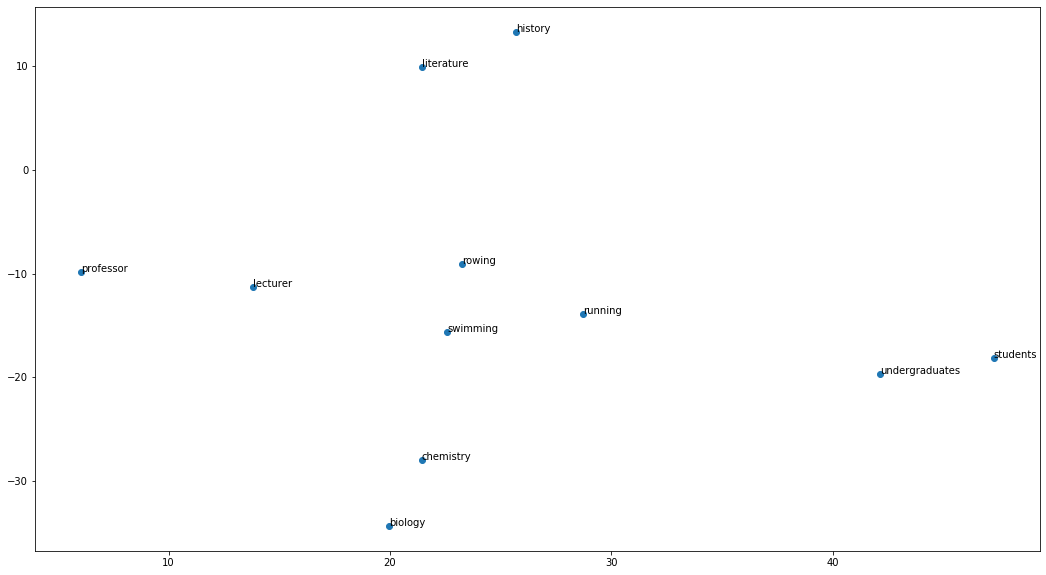

In [44]:
# ANSWER GOES HERE
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

d= {}

d['biology']=model.wv.vocab['biology']
d['chemistry']=model.wv.vocab['chemistry']
d['history']=model.wv.vocab['history']
d['literature']=model.wv.vocab['literature']
d['lecturer']=model.wv.vocab['lecturer']
d['professor']=model.wv.vocab['professor']
d['undergraduates']=model.wv.vocab['undergraduates']
d['students']=model.wv.vocab['students']
d['swimming']=model.wv.vocab['swimming']
d['running']=model.wv.vocab['running']
d['rowing']=model.wv.vocab['rowing']


vocab = list(d)

X = model[vocab]

tsne = TSNE(perplexity=3, n_components=2, learning_rate=1, init='random',random_state=3, n_iter=2000)

X_tsne = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))




# Neural Networks for Sequence data

The signal `seriesSum` in red below is composed of a high frequency component (`series1` in blue) and a low frequency component (`series2` in green) 

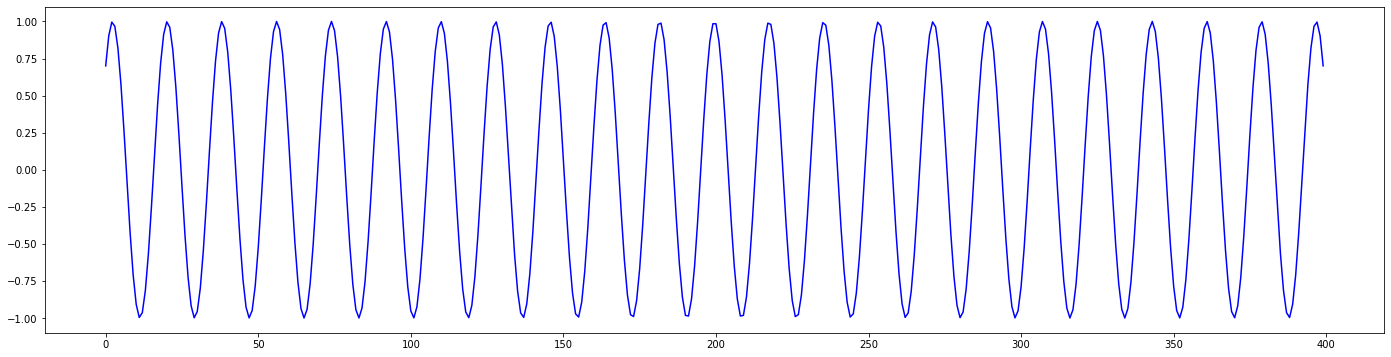

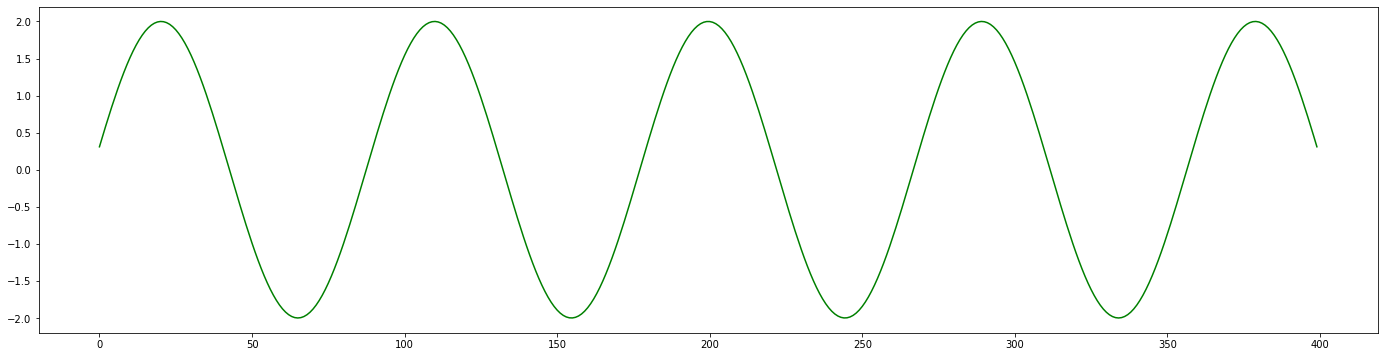

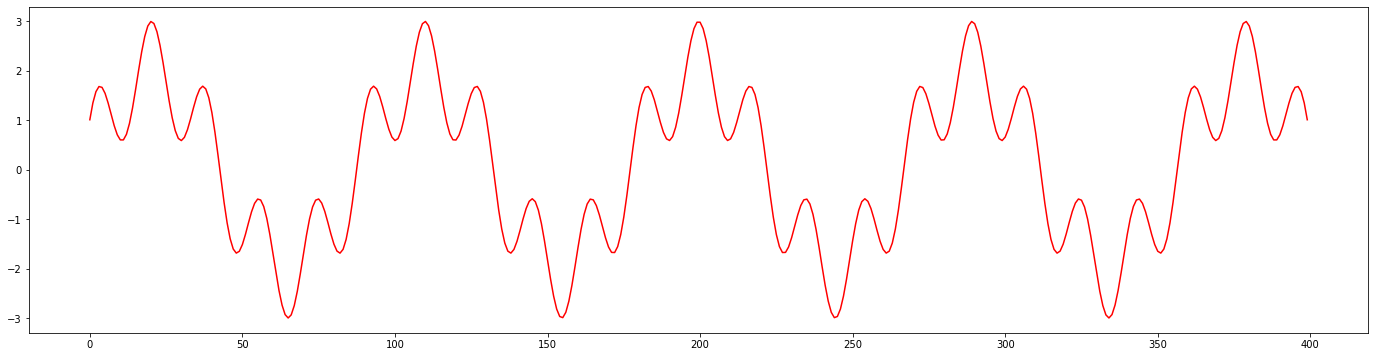

In [45]:
#for n in range(1,5):
import matplotlib.pyplot as plt
import numpy
x = numpy.linspace(-5,5,num=400)
series1 = numpy.cos(1e4/2*x)
series2 = 2*numpy.cos(1e4/10*x)
seriesSum=series1+series2
plt.rcParams["figure.figsize"] = [24,6]
plt.plot(series1,c='b')
plt.show()
plt.plot(series2,c='g')
plt.show()
plt.plot(seriesSum,c='r')

#### 18. Create the appropriate type of neural network that using two thirds of the time series for training is able to predict the rest of the time series. Plot the predictions on both the training and the test data. You should get a prediction accuracy like the picture below or better.

![](./images/tsp.png)

In [46]:
# ANSWER GOES HERE

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


TRAIN_SPLIT = int(len(seriesSum)*2/3)

def univariate_data(dataset, start_index, end_index, history_size, target_size, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        #data.append(dataset[indices])

        #labels.append(dataset[i+target_size])
        if single_step:
            labels.append(dataset[i+target_size])
        else:
            labels.append(dataset[i:i+target_size])
    return np.array(data), np.array(labels)


In [47]:
univariate_past_history = 10
univariate_future_target = 1

x_train_uni, y_train_uni = univariate_data(seriesSum, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target,True)
x_val_uni, y_val_uni = univariate_data(seriesSum, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target,True)

In [48]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [49]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [50]:
EVALUATION_INTERVAL = 120
EPOCHS = 7

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 120 steps, validate for 50 steps
Epoch 1/7
120/120 [==============================] - 3s 21ms/step - loss: 0.9438 - val_loss: 0.7909
Epoch 2/7
120/120 [==============================] - 1s 6ms/step - loss: 0.7230 - val_loss: 0.6449
Epoch 3/7
120/120 [==============================] - 1s 6ms/step - loss: 0.5479 - val_loss: 0.4650
Epoch 4/7
120/120 [==============================] - 1s 6ms/step - loss: 0.3524 - val_loss: 0.2720
Epoch 5/7
120/120 [==============================] - 1s 6ms/step - loss: 0.2060 - val_loss: 0.1631
Epoch 6/7
120/120 [==============================] - 1s 6ms/step - loss: 0.1407 - val_loss: 0.1141
Epoch 7/7
120/120 [==============================] - 1s 6ms/step - loss: 0.1003 - val_loss: 0.0829


In [51]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(24, 10))
    num_out = len(true_future)
    plt.plot(seriesSum,c='r')
    if prediction.any():
        plt.plot(np.arange(num_out)+(len(seriesSum)-(len(prediction))), np.array(prediction), 'k-',
               label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

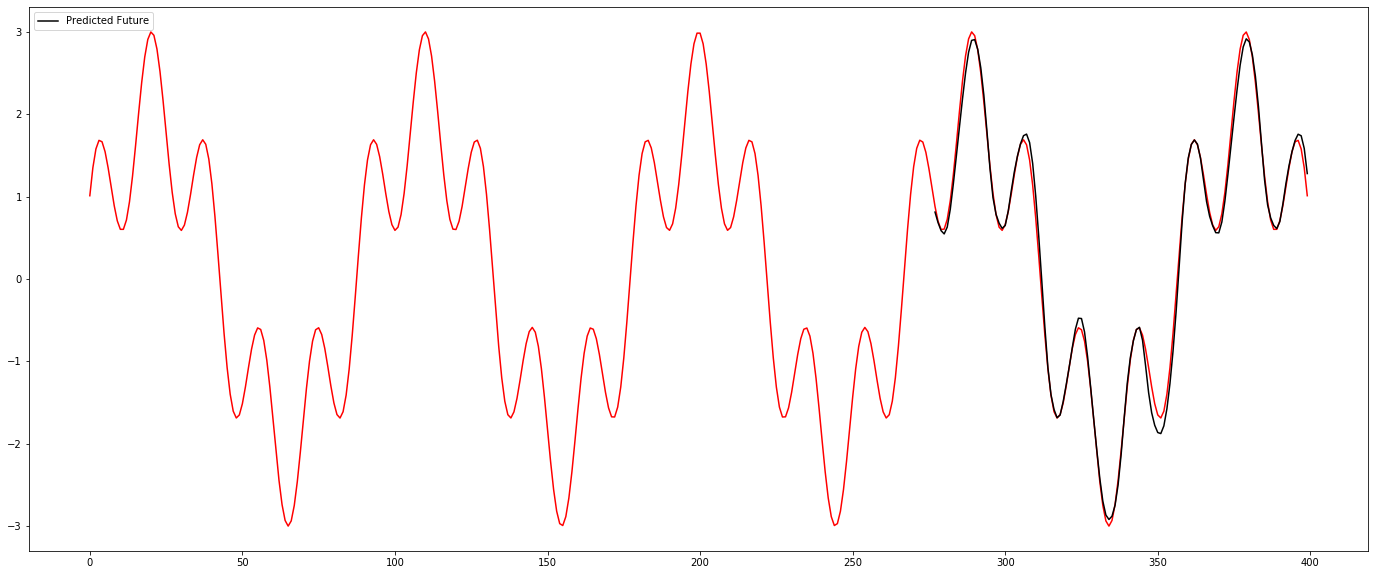

In [52]:
for x, y in val_univariate.take(1):
    multi_step_plot(x, y, simple_lstm_model.predict(x))
    


## Neural style transfer

#### 19. Select two images of your own choosing: a target and a style. Apply the style to your target using the VGG19 computer vision model.

In [1]:
# ANSWER GOES HERE
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# This is the path to the image you want to transform.
target_image_path = './images/church.jpg'
# This is the path to the style image.
style_reference_image_path = './images/vanGogh.jpg'

# Dimensions of the generated picture.
width, height = load_img(target_image_path).size
img_height = 400
img_width = int(width * img_height / height)




Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
from tensorflow.keras.applications import vgg19

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_image(x):
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [3]:
import tensorflow
from tensorflow.keras import backend as K

target_image = K.constant(preprocess_image(target_image_path))
style_reference_image = K.constant(preprocess_image(style_reference_image_path))

# This placeholder will contain our generated image
combination_image = K.placeholder((1, img_height, img_width, 3))

# We combine the 3 images into a single batch
input_tensor = K.concatenate([target_image,
                              style_reference_image,
                              combination_image], axis=0)

# We build the VGG19 network with our batch of 3 images as input.
# The model will be loaded with pre-trained ImageNet weights.
model = vgg19.VGG19(input_tensor=input_tensor,
                    weights='imagenet',
                    include_top=False)
print('Model loaded.')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 37s 0us/step
Model loaded.


In [4]:
def content_loss(base, combination):
    return K.sum(K.square(combination - base))
def gram_matrix(x):
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1)))
    gram = K.dot(features, K.transpose(features))
    return gram


def style_loss(style, combination):
    S = gram_matrix(style)
    C = gram_matrix(combination)
    channels = 3
    size = img_height * img_width
    return K.sum(K.square(S - C)) / (4. * (channels ** 2) * (size ** 2))
def total_variation_loss(x):
    a = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, 1:, :img_width - 1, :])
    b = K.square(
        x[:, :img_height - 1, :img_width - 1, :] - x[:, :img_height - 1, 1:, :])
    return K.sum(K.pow(a + b, 1.25))

In [5]:
# Dict mapping layer names to activation tensors
outputs_dict = dict([(layer.name, layer.output) for layer in model.layers])
# Name of layer used for content loss
content_layer = 'block5_conv2'
# Name of layers used for style loss
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']
# Weights in the weighted average of the loss components
total_variation_weight = 1e-4
style_weight = 1.
content_weight = 0.025

# Define the loss by adding all components to a `loss` variable
loss = K.variable(0.)
layer_features = outputs_dict[content_layer]
target_image_features = layer_features[0, :, :, :]
combination_features = layer_features[2, :, :, :]
loss = loss + content_weight * content_loss(target_image_features,combination_features)
for layer_name in style_layers:
    layer_features = outputs_dict[layer_name]
    style_reference_features = layer_features[1, :, :, :]
    combination_features = layer_features[2, :, :, :]
    sl = style_loss(style_reference_features, combination_features)
    loss = loss + (style_weight / len(style_layers)) * sl
loss = loss + total_variation_weight * total_variation_loss(combination_image)

In [6]:
# Get the gradients of the generated image wrt the loss
grads = K.gradients(loss, combination_image)[0]

# Function to fetch the values of the current loss and the current gradients
fetch_loss_and_grads = K.function([combination_image], [loss, grads])


class Evaluator(object):

    def __init__(self):
        self.loss_value = None
        self.grads_values = None

    def loss(self, x):
        assert self.loss_value is None
        x = x.reshape((1, img_height, img_width, 3))
        outs = fetch_loss_and_grads([x])
        loss_value = outs[0]
        grad_values = outs[1].flatten().astype('float64')
        self.loss_value = loss_value
        self.grad_values = grad_values
        return self.loss_value

    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values

evaluator = Evaluator()

In [7]:
from scipy.optimize import fmin_l_bfgs_b
import imageio
import time

result_prefix = './images/style_transfer_result'
iterations = 5

# Run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss.
# This is our initial state: the target image.
# Note that `scipy.optimize.fmin_l_bfgs_b` can only process flat vectors.
x = preprocess_image(target_image_path)
x = x.flatten()
for i in range(iterations):
    print('Start of iteration', i)
    start_time = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    print('Current loss value:', min_val)
    # Save current generated image
    img = x.copy().reshape((img_height, img_width, 3))
    img = deprocess_image(img)
    fname = result_prefix + '_at_iteration_%d.png' % i
    imageio.imwrite(fname, img)
    end_time = time.time()
    print('Image saved as', fname)
    print('Iteration %d completed in %ds' % (i, end_time - start_time))

Start of iteration 0
Current loss value: 1628582400.0
Image saved as ./images/style_transfer_result_at_iteration_0.png
Iteration 0 completed in 62s
Start of iteration 1
Current loss value: 702750700.0
Image saved as ./images/style_transfer_result_at_iteration_1.png
Iteration 1 completed in 62s
Start of iteration 2
Current loss value: 472205570.0
Image saved as ./images/style_transfer_result_at_iteration_2.png
Iteration 2 completed in 63s
Start of iteration 3
Current loss value: 365158300.0
Image saved as ./images/style_transfer_result_at_iteration_3.png
Iteration 3 completed in 61s
Start of iteration 4
Current loss value: 311739040.0
Image saved as ./images/style_transfer_result_at_iteration_4.png
Iteration 4 completed in 60s


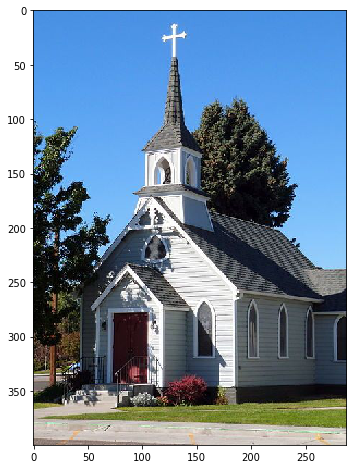

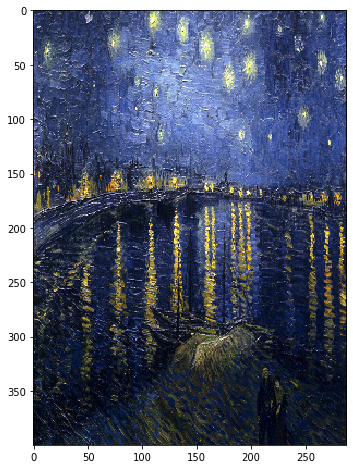

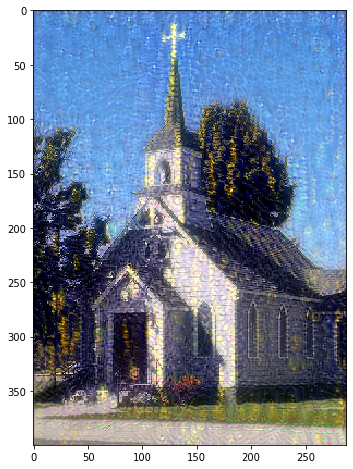

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
# Content image
plt.imshow(load_img(target_image_path, target_size=(img_height, img_width)))
plt.figure()

# Style image
plt.imshow(load_img(style_reference_image_path, target_size=(img_height, img_width)))
plt.figure()

# Generate image
plt.imshow(img)
plt.show()

# Using IBM Watson web services (AI over API):

Create a script that using IBM Watson remote AI APIs does the following:

#### 20. Detects the language in the following string of text

> Parlare è facile. Mostrami il codice

In [53]:
## ANSWER GOES HERE
   
import json
from ibm_watson import LanguageTranslatorV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('vw6vJnKn5yFN0H3wFWfYqk1BhRDteoz8eSFtK6jNGQvl')
language_translator = LanguageTranslatorV3(
    version='2018-05-01',
    authenticator=authenticator)
language_translator.set_service_url('https://api.au-syd.language-translator.watson.cloud.ibm.com/instances/0bb4b76e-ac2c-484d-9cfa-68d5de80f13e')
print(language_translator.identify("Parlare è facile. Mostrami il codice"))
    
#IT has the higest confidence level so the language is it. IT is italian according to the ibm cloud documentation https://cloud.ibm.com/docs/language-translator?topic=language-translator-translation-models#italian

{
    "result": {
        "languages": [
            {
                "language": "it",
                "confidence": 0.9999974205825286
            },
            {
                "language": "fr",
                "confidence": 1.0667344111291548e-06
            },
            {
                "language": "ro",
                "confidence": 9.641316715905738e-07
            },
            {
                "language": "ca",
                "confidence": 2.7364073443279304e-07
            },
            {
                "language": "sl",
                "confidence": 8.563744425564444e-08
            },
            {
                "language": "hr",
                "confidence": 3.2580292153092866e-08
            },
            {
                "language": "az",
                "confidence": 2.462316109094234e-08
            },
            {
                "language": "cs",
                "confidence": 2.232881297811508e-08
            },
            {
                "language

#### 21. Translates the sentence to English

In [54]:
# ANSWER GOES HERE

translation = language_translator.translate(
    text='Parlare è facile. Mostrami il codice', model_id='it-en').get_result()
print(json.dumps(translation, indent=2, ensure_ascii=False))

{
  "translations": [
    {
      "translation": "Talking is easy. Show me the code"
    }
  ],
  "word_count": 6,
  "character_count": 36
}


#### 22. Synthesizes the resulting translation into a male voice in English and writes that to a wav file.

In [60]:
# ANSWER GOES HERE

import json
from os.path import join, dirname
from ibm_watson import TextToSpeechV1
from ibm_watson.websocket import SynthesizeCallback
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('RmcBGaq1fa2R_ZtFYtq4dW9xSob5AEXl2Yfib9D56rE9')
text_to_speech = TextToSpeechV1(authenticator=authenticator)
text_to_speech.set_service_url('https://api.us-south.text-to-speech.watson.cloud.ibm.com/instances/56cc1fa5-eb55-4b9d-a64d-0c7651a0552f')
with open('./output.wav',
          'wb') as audio_file:
    response = text_to_speech.synthesize(
        translation['translations'][0]['translation'], accept='audio/wav',
        voice="en-US_MichaelV2Voice").get_result()
    audio_file.write(response.content)


## Transformers

#### 23. Use a transformer model to obtain vector representations of the words in the following sentences. Then compare the cosine similarity between the different senses with which the word *bank* is being used in the sentences. Explain the results you get.

In [1]:
sentence1 = 'I sat by river bank'
sentence2 = 'I went to the bank to get a mortgage'
sentence3 = 'My bank is not lending me any money'

In [2]:
# ANSWER GOES HERE
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline
nlp = pipeline('feature-extraction',model='bert-base-uncased')
s1=nlp(sentence1)
s2=nlp(sentence2)
s3=nlp(sentence3)


vectorRepresentationOfBankInSentence1=np.array(s1[0][1]).reshape(1,-1)
vectorRepresentationOfBankInSentence2=np.array(s2[0][1]).reshape(1,-1)
vectorRepresentationOfBankInSentence3=np.array(s3[0][1]).reshape(1,-1)

print(f'Sentence 1\'s bank with sentence 2\'s bank{cosine_similarity(vectorRepresentationOfBankInSentence1,vectorRepresentationOfBankInSentence2)}')
print(f'Sentence 1\'s bank with sentence 3\'s bank{cosine_similarity(vectorRepresentationOfBankInSentence1,vectorRepresentationOfBankInSentence3)}')
print(f'Sentence 2\'s bank with sentence 3\'s bank{cosine_similarity(vectorRepresentationOfBankInSentence2,vectorRepresentationOfBankInSentence3)}')

print('sentence 2 and sentence 3 meaning of bank is very similar however sentence 1 and 2 bank is abit similar as well. We should use the whole sentence to get a better representation')

vectorRepresentationOfEntireSentence1=np.array(s1[0][1:]).mean(axis=0).reshape(1, -1)
vectorRepresentationOfEntireSentence2=np.array(s2[0][1:]).mean(axis=0).reshape(1, -1)
vectorRepresentationOfEntireSentence3=np.array(s3[0][1:]).mean(axis=0).reshape(1, -1)

print(f'Sentence 1 with sentence 2{cosine_similarity(vectorRepresentationOfEntireSentence1,vectorRepresentationOfEntireSentence2)}')
print(f'Sentence 1 with sentence 3{cosine_similarity(vectorRepresentationOfEntireSentence1,vectorRepresentationOfEntireSentence3)}')
print(f'Sentence 2 with sentence 3{cosine_similarity(vectorRepresentationOfEntireSentence2,vectorRepresentationOfEntireSentence3)}')


print('sentence 2 seems to be more related to be sentence 3 since the word bank in in sentence 2 and 3 means monetary bank while sentence 1\'s bank means the land alongside or sloping down to a river or lake')


Sentence 1's bank with sentence 2's bank[[0.67435882]]
Sentence 1's bank with sentence 3's bank[[0.52449842]]
Sentence 2's bank with sentence 3's bank[[0.68179527]]
sentence 2 and sentence 3 meaning of bank is very similar however sentence 1 and 2 bank is abit similar as well. We should use the whole sentence to get a better representation
Sentence 1 with sentence 2[[0.59401618]]
Sentence 1 with sentence 3[[0.56659188]]
Sentence 2 with sentence 3[[0.76042698]]
sentence 2 seems to be more related to be sentence 3 since the word bank in in sentence 2 and 3 means monetary bank while sentence 1's bank means the land alongside or sloping down to a river or lake


#### 24. The following text is taken from the Wikipedia entry about Apollo 11 mission to the surface of the moon. Use a transformer model to get an answer to the question providing as context the *wikipediaApollo11* text:
    > What were Neil Armstrong first words on the surface of the moon?

In [3]:
wikipediaApollo11 = """
Apollo 11 was the spaceflight that first landed humans on the Moon. Commander Neil Armstrong and lunar module pilot Buzz Aldrin
formed the American crew that landed the Apollo Lunar Module Eagle on July 20, 1969, at 20:17 UTC. Armstrong became the first
person to step onto the lunar surface six hours and 39 minutes later on July 21 at 02:56 UTC; Aldrin joined him 19 minutes later.
They spent about two and a quarter hours together outside the spacecraft, and they collected 47.5 pounds (21.5 kg) of lunar
material to bring back to Earth. Command module pilot Michael Collins flew the Command Module Columbia alone in lunar orbit 
while they were on the Moon's surface. Armstrong and Aldrin spent 21 hours, 36 minutes on the lunar surface at a site they 
named Tranquility Base before lifting off to rejoin Columbia in lunar orbit. After being sent to the Moon by the Saturn V's
third stage, the astronauts separated the spacecraft from it and traveled for three days until they entered lunar orbit.
Armstrong and Aldrin then moved into Eagle and landed in the Sea of Tranquility on July 20. The astronauts used Eagle's ascent
stage to lift off from the lunar surface and rejoin Collins in the command module. They jettisoned Eagle before they performed 
the maneuvers that propelled Columbia out of the last of its 30 lunar orbits onto a trajectory back to Earth. They returned 
to Earth and splashed down in the Pacific Ocean on July 24 after more than eight days in space. Armstrong's first step onto
the lunar surface was broadcast on live TV to a worldwide audience. He described the event as "one small step for a man, one 
giant leap for mankind." Apollo 11 effectively ended the Space Race and fulfilled a national goal proposed in 1961 by President
John F. Kennedy: "before this decade is out, of landing a man on the Moon and returning him safely to the Earth."
"""

# ANSWER GOES HERE
from transformers import pipeline
nlp = pipeline("question-answering")
print(nlp(question="What were Neil Armstrong first words on the surface of the moon?", context=wikipediaApollo11))



{'score': 0.4539134547033541, 'start': 1601, 'end': 1657, 'answer': '"one small step for a man, one giant leap for mankind."'}


#### 25. The following is an article that appeared in 2008 on the Wall Street Journal during the midst of a financial crisis. Use a transformer model to identify automatically all the organizations (i.e. companies) that appear in the article. Also Tokenize the article into independent sentences (you can use the TextBlob library for easily doing that). Then, also using a transformer model, analyze the sentiment of each sentence that contains a previously identified organization name. Tally the sentiment associated to each sentence were an organization appears and provide an overall estimate of the sentiment with which a given organization is associated in this article. Your output should allow anyone inspecting it to clearly identify the organization/s that is associated with the most positive/negative sentiments.

In [4]:
wsjArticle="""Consolidation in the air is once again in the air, so to speak. But is the business case for airline mergers any 
stronger today than two years ago, when this column rained on a similar parade? US Airways' Doug Parker, ironically one of the 
most consistent voices in favor of consolidation, recently offered in a conference call a hymn of praise to his competitors 
for aggressively cutting capacity to protect margins despite softening traffic. He placed his finger accurately on the 
recurrent source of airline grief -- too many seats chasing too few passengers in a travel slump. Downturns in the last 15 
years have twice wiped out all the profits the industry earned since Wilbur and Orville put wings on a bicycle. Yet now 
Mr. Parker says his fellow skippers' latest efforts to keep available seats in line with demand represent a "pivotal and 
probably momentous change in our industry." If airlines are able (for once) to maintain margins in a slump, what's the urgency
of consolidation? Good question. Mergers have been touted for decades as a cure for airline woes. But the costs and pain of a 
merger -- including labor strife and incompatible fleets and maintenance routines -- are borne by the merging parties, while 
the alleged benefits -- less competition, higher fares -- are shared equally by competitors. Why be the sucker in this scenario?
A few costs at headquarters and the gate might be reduced, but how would a merger cut fuel or crew costs? Planes already are 
flying 80% to 85% full, leaving little scope for consolidation of passenger loads. And parking planes in the desert is a quicker
, cheaper way to reduce capacity in a travel recession. It's hard to see how consolidation would help much here, in the short 
term anyway. So why the merger talk? United's Glenn Tilton has been a chief perpetrator, but United has been at a loss about 
how to control costs (read pilots) well enough to avoid falling back into bankruptcy. And Delta is under pressure from hedge 
funds to seek a deal with either United or Northwest, though Delta's board could yet shrink from a tie-up. Both airlines are 
special cases -- with shareholders and/or executives eager to trigger a "liquidity event" to get out of their stock positions.
Yet now comes the backflip. On the radar screen are two new motivations for mergers -- one good, the other a national disaster
in the making. In March, a new "Open Skies" arrangement with the European Union will allow U.S. carriers to fly at will across
the Atlantic, and between European airports. Somebody somewhere in airline suites undoubtedly is thinking how to get ahead in 
the scramble to reorganize his feeder networks and international gateways to capture a bigger share of this high-margin traffic.
Another reason mergers may finally be on the in-flight menu is a less happy one -- the U.S. air travel system's catastrophic
devolution toward capacity-rationing by delay. Blame the FAA. Over the past 20 years, the agency has been utterly defeated by
its own bureaucratic and budgetary unsuitability to manage the complex technological upgrades required to keep pace with 
traffic growth. The consequences are already visible. Network airlines are withdrawing service, even profitable service, 
from smaller cities because it displaces more profitable traffic at congested hubs. Airline execs have been predicting for
years that rationing was just around the corner. The corner has arrived. The agency simply can't accommodate the billion 
passengers that, at current growth rates, would be seeking to fly in 2015. Economic prosperity and travel demand no longer
will determine the size of the aviation market. There will only be as much flying as the FAA's antiquated systems can permit.
Ill is the wind that doesn't blow somebody a kiss, and such an environment is naturally more conducive to oligopoly pricing.
Straitened capacity and growing politicization of the process by which take-off and landing slots are meted out will tend to
favor incumbents over startups and interlopers, such as the low-cost carriers that once kept fares down and undermined any 
claim that consolidation among the majors might bring less competition. Blame Congress. Presidents of both parties have argued
for liberating the ATC system from the congressional budget morass, but Congress is loath to give up its vast patronage
privileges. William Ris, head of government relations for American Airlines, points to a related problem: Lawmakers "react 
first as customers and only secondly as policy makers." Congressional leaders fly constantly, and are no more analytical than
the arthritic grandmother stuffed into seat 23A about the reasons for delays and cancellations. Instead, we get angry hearings
blaming the airlines for "overscheduling." We get people like Chuck Schumer haranguing Delta for canceling service to 
Binghamton. We get Barbara Boxer telling airlines when they must taxi back to the terminal and let passengers get off a plane
whose takeoff has been delayed, though the cause of delays is usually the ATC system. Blame the airlines. The major carriers
have gone AWOL in the fight for a reformed FAA. After 20 years of frustration, they no longer lobby or argue the case within
hearing of the public. When the final meltdown occurs, expect the big incumbents cheerfully to repair to a congressional
smoke-free room and divide up the system's limited capacity to the benefit of the big incumbents."""

# ANSWER GOES HERE
from transformers import pipeline
organizations = []
nlp = pipeline("ner",grouped_entities=True)
for e in nlp(wsjArticle):
    if(e['entity_group'] == 'I-ORG') and (e['score']>0.98):
        organizations.append(e['word'])
    print(e)



{'entity_group': 'I-ORG', 'score': 0.999360054731369, 'word': 'US Airways'}
{'entity_group': 'I-PER', 'score': 0.9995879828929901, 'word': 'Doug Parker'}
{'entity_group': 'I-PER', 'score': 0.9920189181963602, 'word': 'Wilbur'}
{'entity_group': 'I-PER', 'score': 0.9922996461391449, 'word': 'Orville'}
{'entity_group': 'I-PER', 'score': 0.9995893239974976, 'word': 'Parker'}
{'entity_group': 'I-ORG', 'score': 0.9994946122169495, 'word': 'United'}
{'entity_group': 'I-ORG', 'score': 0.8890502452850342, 'word': 'Glenn'}
{'entity_group': 'I-ORG', 'score': 0.9983097910881042, 'word': 'United'}
{'entity_group': 'I-ORG', 'score': 0.9969778656959534, 'word': 'Delta'}
{'entity_group': 'I-ORG', 'score': 0.9981585144996643, 'word': 'United'}
{'entity_group': 'I-ORG', 'score': 0.99765545129776, 'word': 'Northwest'}


In [5]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(wsjArticle)


In [6]:
print(len(sentences))
organizations = set(organizations)
print(organizations)

46
{'Delta', 'Northwest', 'United', 'US Airways'}


In [7]:
nlp = pipeline("sentiment-analysis")
sentences_contains_organization = []
for organization in organizations:
    for sentence in sentences:
        if organization in sentence:
            sentences_contains_organization.append(sentence)
            print(f'Organization:{organization} \n Sentence: {sentence} \n Sentimental analysis:{nlp(sentence)} \n\n')



Organization:Delta 
 Sentence: And Delta is under pressure from hedge 
funds to seek a deal with either United or Northwest, though Delta's board could yet shrink from a tie-up. 
 Sentimental analysis:[{'label': 'NEGATIVE', 'score': 0.9906107783317566}] 


Organization:Delta 
 Sentence: We get people like Chuck Schumer haranguing Delta for canceling service to 
Binghamton. 
 Sentimental analysis:[{'label': 'NEGATIVE', 'score': 0.996892511844635}] 


Organization:Northwest 
 Sentence: And Delta is under pressure from hedge 
funds to seek a deal with either United or Northwest, though Delta's board could yet shrink from a tie-up. 
 Sentimental analysis:[{'label': 'NEGATIVE', 'score': 0.9906107783317566}] 


Organization:United 
 Sentence: United's Glenn Tilton has been a chief perpetrator, but United has been at a loss about 
how to control costs (read pilots) well enough to avoid falling back into bankruptcy. 
 Sentimental analysis:[{'label': 'NEGATIVE', 'score': 0.998734712600708}] 



# Deliverables

#### 26. Hand in a single python notebook file (.ipynb) and the images from the TensorBoard exercise. Do not include any data sets in your GitHub repository!!! Use separate code cells to organize your code. Name your Python notebook according to the following pattern: *yourLastName_DSMI_A2.ipynb*. Create your own private repository for you to work on the Assignment by using the following link: 
[https://classroom.github.com/a/nqPvsvGQ](https://classroom.github.com/a/nqPvsvGQ)
The notebook file should be available in your own private GitHub repository “https://github.com/OPClasses2/assignment2-YourGithubUserName” and I will be able to fetch it from there. 

---